This script generates quantum circuit for a two-body time-evolution operator under a Hamiltonian $$ H = \sum_{i<j}^{N} J_{ij} \vec{\sigma_i} \cdot \vec{\sigma_j}, $$  where the coupling constant of the pair interaction given by $ J_{ij} \equiv \mu/N * (1-cos(\theta_{ij})) $ and $ \vec{\sigma_i} $ are the Pauli matrices for the i-th qubit. The operator $ u_{ij}(dt) $ is the time-evolution operator for time dt. The two-body part of the propagator, as approximated in Eq. (17) of the paper, is the product of pair terms of the form

$$
u_{ij}(dt) = e^{-idtJ_{ij}(X \otimes X + Y \otimes Y + Z \otimes Z)}.
$$


This script generates the quantum circuit for the two-body term asgiven in Fig 7 of the paper.


##  Gates as introduced in PRD 107, 023007 (2023)
### 1. $R_z$ Gate

$$
R_z(\lambda) = \begin{pmatrix}
e^{-i\lambda/2} & 0 \\
0 & e^{i\lambda/2}
\end{pmatrix}
$$

### 2. $U_q$ Gate

The general single-qubit rotation gate with three Euler angles is defined as:

$$
U_q(\theta, \phi) = \begin{pmatrix}
\cos(\theta/2) & -ie^{-i\phi}\sin(\theta/2) \\
-ie^{i\phi}\sin(\theta/2) & \cos(\theta/2)
\end{pmatrix}
$$


### 3. ZZ Gate

The two-qubit ZZ interaction is given by:

$$
ZZ = \exp\left(-i\frac{\pi}{4} Z \otimes Z\right) = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & i & 0 & 0 \\
0 & 0 & i & 0 \\
0 & 0 & 0 & 1
\end{pmatrix}
$$

## Gates as introduced in Qiskit.

### 1. $R_z$ Gate

The single-qubit rotation about the Z-axis is defined as:

$$
R_z(\lambda) = \begin{pmatrix}
e^{-i\lambda/2} & 0 \\
0 & e^{i\lambda/2}
\end{pmatrix}
$$

This is a diagonal gate and can be implemented virtually in hardware via frame changes.

### 2. UGate

The `UGate` in Qiskit is a generic single-qubit rotation gate with 3 Euler angles, which can be applied with the `u` method:

$$
U(\theta, \phi, \lambda) = \begin{pmatrix}
\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i(\phi+\lambda)}\cos(\theta/2)
\end{pmatrix}
$$

### 3. RZZGate

The `RZZGate` in Qiskit is defined as a parametric 2-qubit \( Z \otimes Z \) interaction (rotation about ZZ):
This gate is symmetric, maximally entangling at \( \theta = \pi/2 \), and can be applied with the `rzz` method in Qiskit.

#### Matrix Representation:
$$
R_{ZZ}(\theta) = \exp\left(-i \frac{\theta}{2} Z \otimes Z\right) = \begin{pmatrix}
e^{-i\theta/2} & 0 & 0 & 0 \\
0 & e^{i\theta/2} & 0 & 0 \\
0 & 0 & e^{i\theta/2} & 0 \\
0 & 0 & 0 & e^{-i\theta/2}
\end{pmatrix}
$$

This is a direct sum of RZ rotations, so this gate is equivalent to a uniformly controlled (multiplexed) RZ gate:

$$
R_{ZZ}(\theta) = \begin{pmatrix}
RZ(\theta) & 0 \\
0 & RZ(-\theta)
\end{pmatrix}
$$


#### To equate the expressions for U and $U_q$ given their matrix representations, we need to find a suitable parameterization such that U(θ,ϕ,λ) is equivalent to $U_q(θ,ϕ).$
#### For this quantum circuit is to be assembled using the `Qiskit` package, the following relationships must be taken into account

$$
U_{q} (\theta,\phi) = U \left( \theta, \phi - \frac{\pi}{2}, \frac{\pi}{2} - \phi \right) 
$$

#### where $ u(\theta, \phi, \lambda) \in SU(2) $ is the general single-qubit gate supported by `Qiskit`, and

$$
ZZ = R_{zz}(\pi/2)
$$

#### up to a global phase.


/home/zohalaraib/.local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


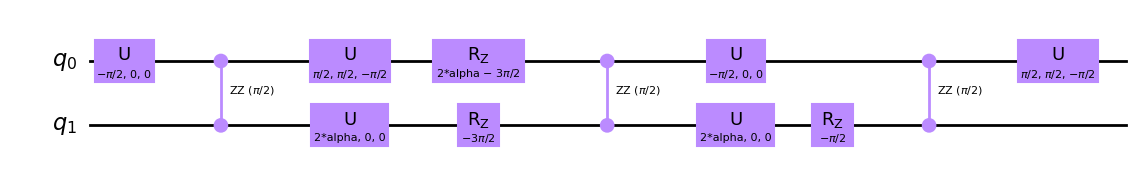

In [1]:
# The U_q gate can be realized using the general u gate in Qiskit, which is defined as U(θ,ϕ,λ). 
# In quantinuum the U_q gate has two independent parameters U(θ,ϕ) while in Qiskit there are three independent 
# parameters U(θ,ϕ,λ) to tweak. See the matrixes of each to find an equivalent step with these parameters. 
# The R_z gate is directly available as rz in Qiskit, and the ZZ gate can be realized as the rotation by theta=pi/2 to generate the ZZ gate in the paper.


from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from math import pi

# Define the parameter alpha = -dt* J_ij
alpha = Parameter('alpha')

# Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2)

# Apply the Uq gate with theta = -pi/2 and phi = pi/2 to first qubit. 
# equivalent u gate in qiskit with theta = -pi/2, phi = 0, lambda = 0 
qc.u(-pi/2, 0, 0, 0)

# Apply the RZZ gate to generate the ZZ gate in the paper with theta = pi/2
qc.rzz(pi/2, 0, 1)

# Apply the Uq gate with U(θ,ϕ,λ) to both qubits.
# where Uq gate on first qubit with theta = pi/2, phi = pi 
# equivalent u gate in qiskit with theta = pi/2, phi = pi/2, lambda = -pi/2
qc.u(pi/2, pi/2, -pi/2, 0)
# and on second quibit is theta = 2*alpha, phi = pi/2
# equivalent u gate in qiskit with theta = 2*alpha, phi = 0, lambda = 0 
qc.u(2*alpha, 0, 0, 1)

# Apply the Rz gate with lambda = 2*alpha - 3*pi/2 to first qubit and lambda = - 3*pi/2 to the second.
qc.rz(2*alpha - 3*pi/2, 0)
qc.rz(-3*pi/2, 1)

# Apply the RZZ gate with theta = pi/2
qc.rzz(pi/2, 0, 1)

# Apply the Uq gate with theta = -pi/2 and phi = pi/2 to first qubit. 
# equivalent u gate in qiskit with theta = -pi/2, phi = 0, lambda = 0 
qc.u(-pi/2, 0, 0, 0)
# and on second quibit is theta = 2*alpha, phi = pi/2
# equivalent u gate in qiskit with theta = 2*alpha, phi = 0, lambda = 0 
qc.u(2*alpha, 0, 0, 1)

# Apply the Rz gate with lambda = -pi/2 to second qubit.
qc.rz(-pi/2, 1)

# Apply the RZZ gate with theta = pi/2
qc.rzz(pi/2, 0, 1)

# Apply the Uq gate with theta = pi/2 and phi = pi to first qubit.
# equivalent u gate in qiskit with theta = pi/2, phi = pi/2, lambda = -pi/2
qc.u(pi/2, pi/2, -pi/2, 0)

# Display the circuit
qc.draw('mpl')
